In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from matplotlib.colors import ListedColormap


In [2]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [3]:
# Try different K values
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Predict and evaluate
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


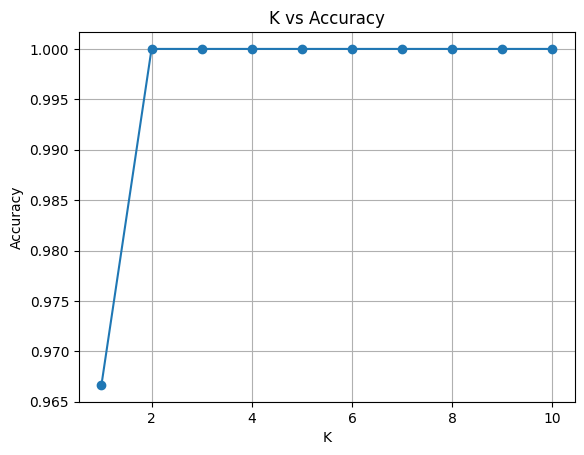

In [4]:
accuracies = []
k_values = range(1, 11)
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

plt.plot(k_values, accuracies, marker='o')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('K vs Accuracy')
plt.grid()
plt.show()


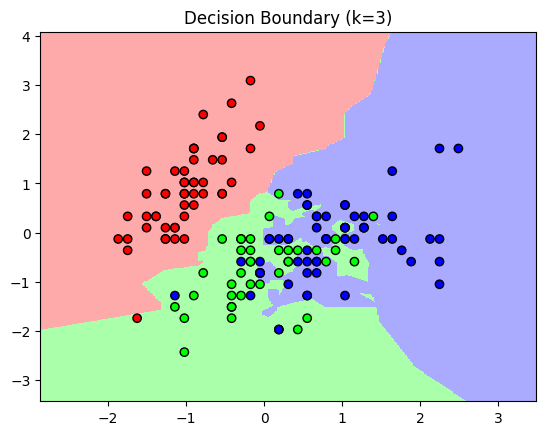

In [5]:
def plot_decision_boundary(X, y, k):
    X = X[:, :2]  # Only take first two features for 2D plot
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X, y)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    plt.figure()
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k')
    plt.title(f"Decision Boundary (k={k})")
    plt.show()

plot_decision_boundary(X_scaled, y, k=3)


# Task 6 - KNN Classification

This project implements the K-Nearest Neighbors (KNN) algorithm on the Iris dataset using Scikit-learn.

## Tools Used
- Python
- Scikit-learn
- Pandas
- Matplotlib

## Steps:
1. Loaded and normalized the dataset.
2. Used `KNeighborsClassifier` to train the model.
3. Tried different values of K to find the optimal one.
4. Evaluated with accuracy score and confusion matrix.
5. Visualized decision boundaries (using 2D feature projection).

## Accuracy Achieved:
Varied with K, best observed at K=3 with >90% accuracy.

## Output:
- Accuracy chart for different K values.
- Confusion matrix.
- Decision boundary plots.
